In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import tqdm
# import cv2 as cv

In [3]:
# f = open("blurred_img_psf.raw", "rb").read() 
# # A = np.fromfile("blurred_img_psf.raw", dtype='int8', sep="")
# # A = np.reshape(A, (256, 512))

In [2]:
A = np.genfromtxt("blurred_img_psf.csv", delimiter=',')

In [3]:
blurr_img = A[0:255,0:255]
psf = A[0:255,256:511]

In [6]:
blurr_img.shape

(255, 255)

In [7]:
psf.shape

(255, 255)

In [8]:
# psf_hat = psf[255:-1:1,255:-1:1]

In [9]:
psf_hat = psf[::-1,::-1]

In [10]:
u_old = blurr_img+0j #initial estimate, or 0.5*ones(size(image));
# u_old = 0.5*np.ones(blurr_img.shape)+0j
# PSF_HAT = PSF(end:-1:1,end:-1:1); #% spatially reversed psf
#% iterate towards ML estimate for the latent image
for i in tqdm.tqdm(range(0,100)):
    U_old = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(u_old)))
    P = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(psf)))
    denm = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(U_old*P)))
    denm = blurr_img/denm
    D = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(denm)))
    P_hat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(psf_hat)))
    u_old *= np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(D * P_hat)))

#     
#     est_conv = signal.convolve2d(latent_est,psf, mode='same')
#     relative_blur = blurr_img/est_conv;
#     error_est = signal.convolve2d(relative_blur,psf_hat, mode='same')
#     latent_est = latent_est * error_est

100%|████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.67it/s]


100%|████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.07it/s]


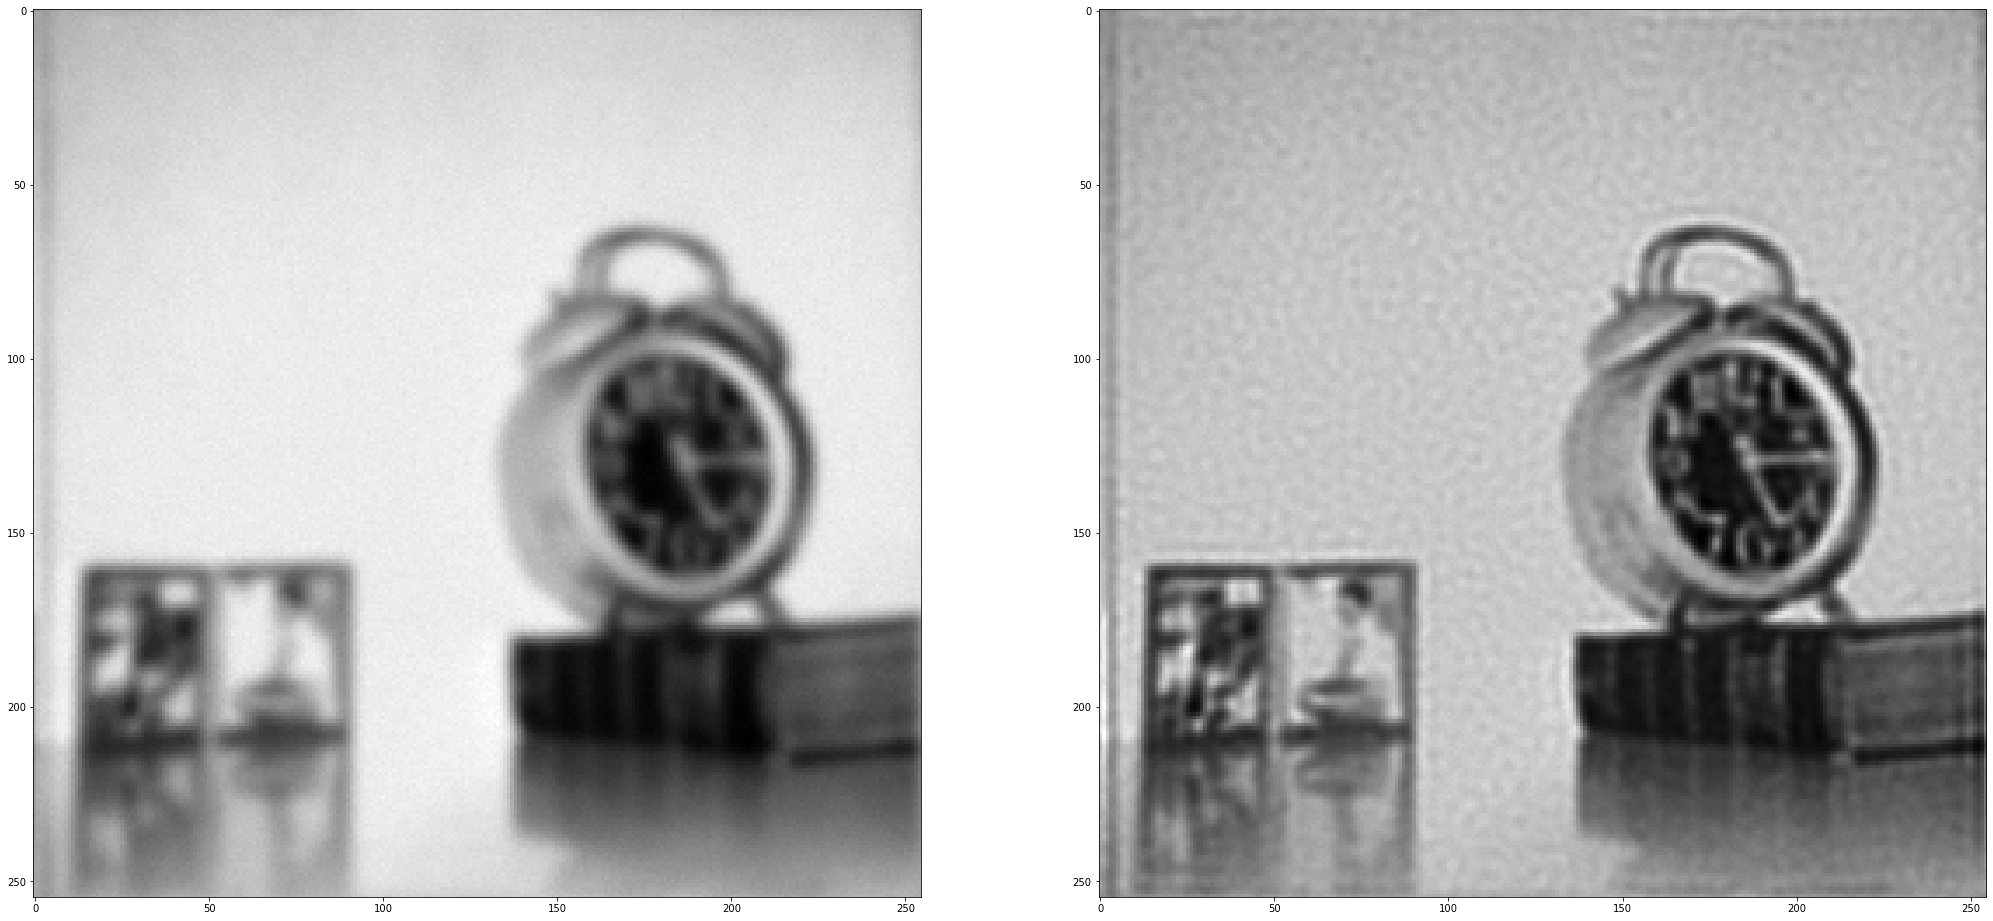

In [5]:
u_old = blurr_img+0j
psf_hat = psf[::-1,::-1]
for i in tqdm.tqdm(range(0,100)):
    U_old = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(u_old)))
    P = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(psf)))
    denm = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(U_old*P)))
    denm = blurr_img/denm
    D = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(denm)))
    P_hat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(psf_hat)))
    u_old *= np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(D * P_hat)))
    
im, ax = plt.subplots(1, 2, figsize= (35,110))
ax[0].imshow(blurr_img, cmap='gray')
# ax[0].set_title(’Original Image’)
ax[1].imshow(np.abs(u_old), cmap='gray')
# ax[1].set_title(’Iterated Image’)

In [71]:
t = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(blurr_img)))*np.fft.fftshift(np.fft.fft2(np.fft.fftshift(psf))))))

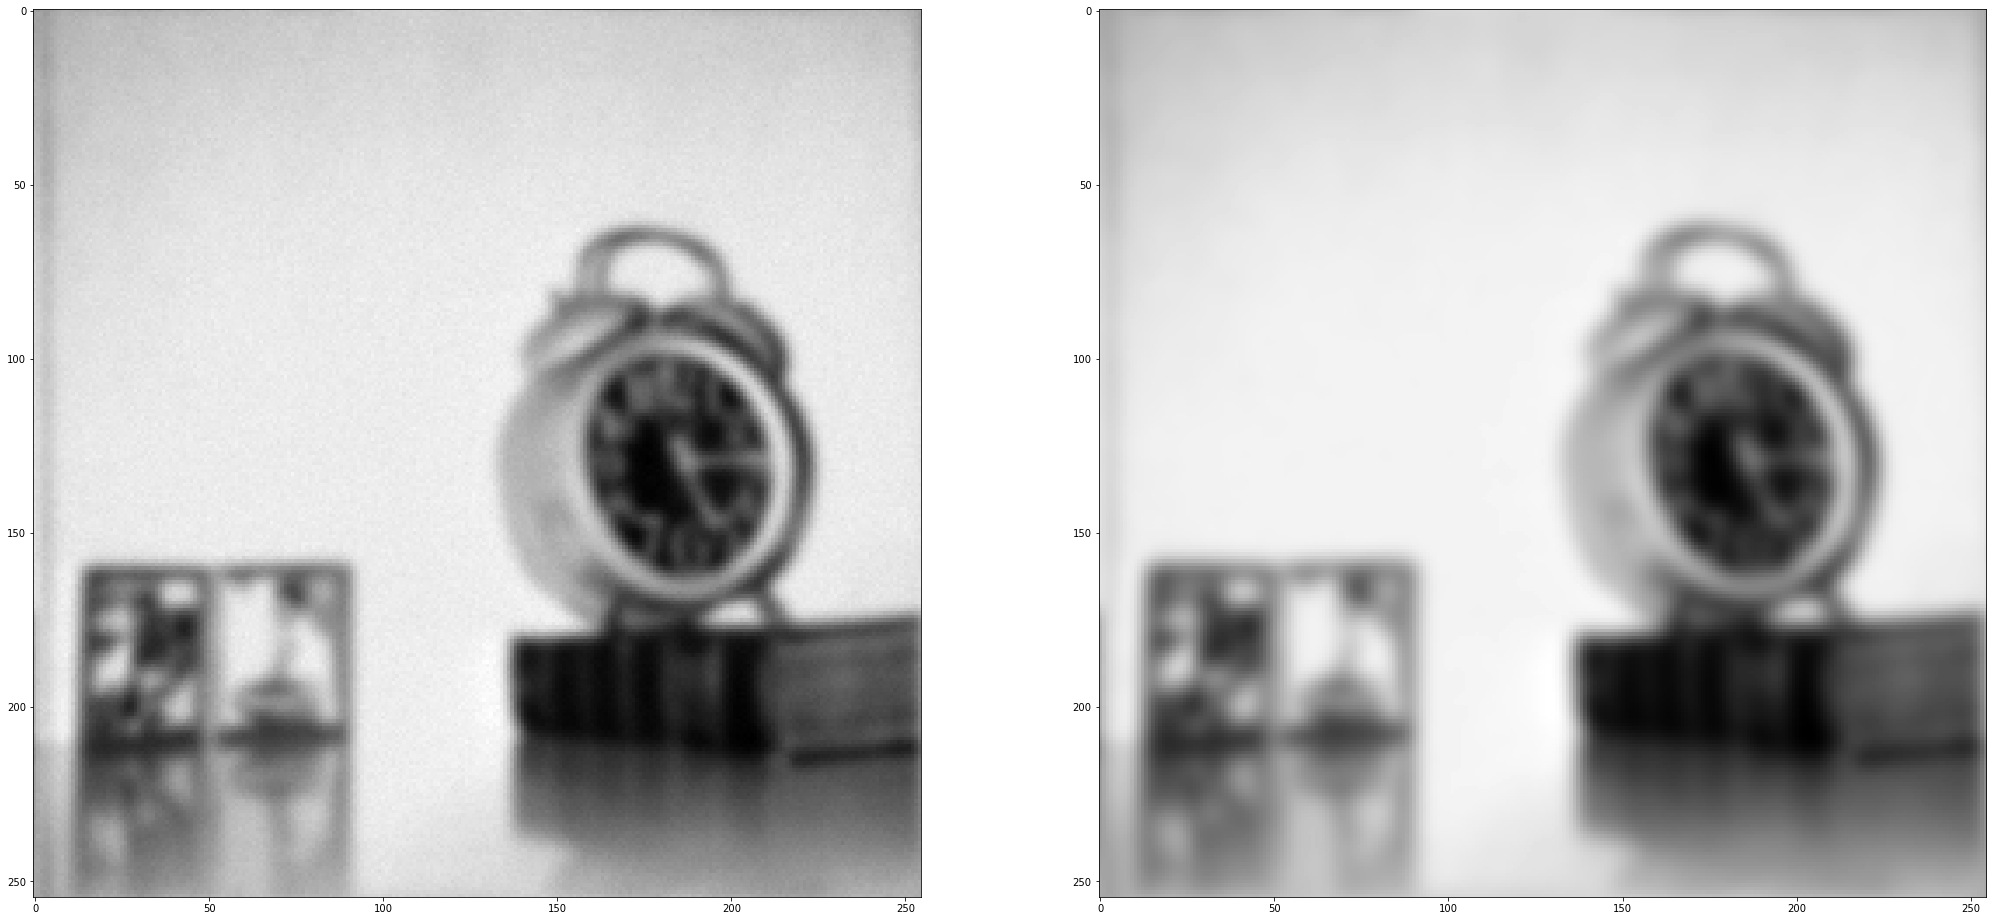

In [72]:
im, ax = plt.subplots(1, 2, figsize= (35,110))
ax[0].imshow(blurr_img, cmap='gray')
# ax[0].set_title(’Original Image’)
ax[1].imshow(np.abs(t), cmap='gray')
# ax[1].set_title(’Iterated Image’)